# Finding a Proper Drug for a New Patient using Decision Tree

### Importing Required Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data from CSV File

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Data Science\drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Data Preprocessing

In [3]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

### Data Visualization

<IPython.core.display.Javascript object>


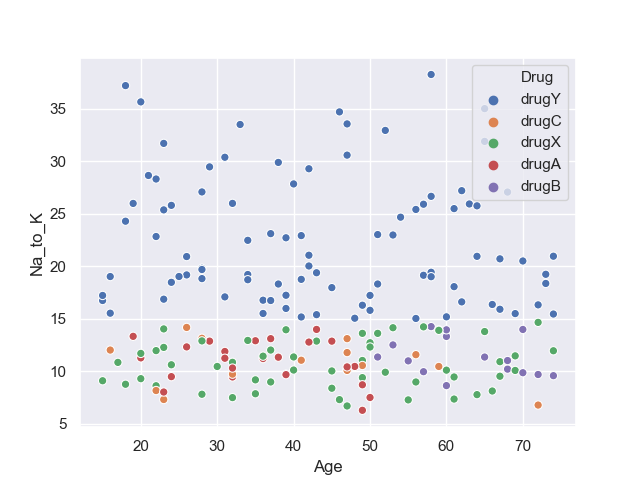

In [4]:
import seaborn as sns
sns.set()
plt.figure()
sns.scatterplot(x = df.Age, y = df.Na_to_K, hue = df.Drug)

### Splitting Data into Train and Test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 0)

### Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Model Accuracy

In [7]:
drugTree.score(X_test, y_test)

1.0

### Predicting the Proper Drug for a New Patient

In [8]:
drugTree.predict([[35, 1, 2, 0, 15.593266]])

array(['drugY'], dtype=object)

### Evaluation Metrics

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
y_test_hat = drugTree.predict(X_test)
print(classification_report(y_test, y_test_hat))
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_test_hat))
print("Jaccard Index = ", jaccard_score(y_test, y_test_hat, average = 'weighted'))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14
       drugY       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix : 
[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 19]]
Jaccard Index =  1.0
